In [5]:
%matplotlib inline
%reload_ext Cython
from __future__ import print_function
font = {'family' : 'sans-serif',
        'style': 'normal',
        'weight' : 'medium',
        'size' : 8}
import matplotlib
matplotlib.rc('font', **font)
import os
import time
import pylab as plt
import numpy as np
from numpy import int16, uint16, uint8, float16, log2
import pickle
import glob

import cv2
from cv2 import cvtColor as convertColor, COLOR_BGR2GRAY, COLOR_GRAY2RGB,\
                resize, imread, imwrite


    


641 641


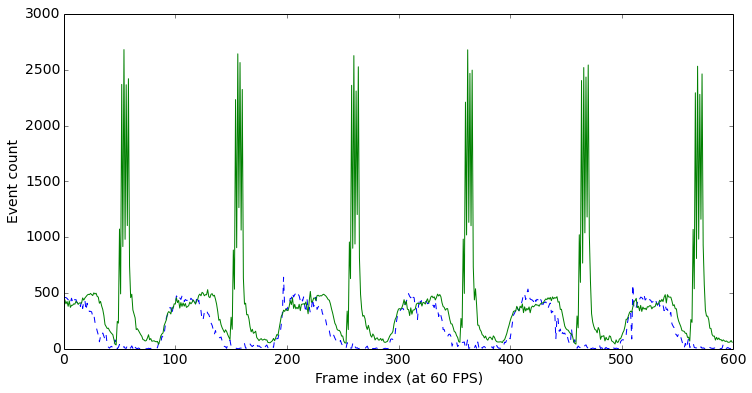

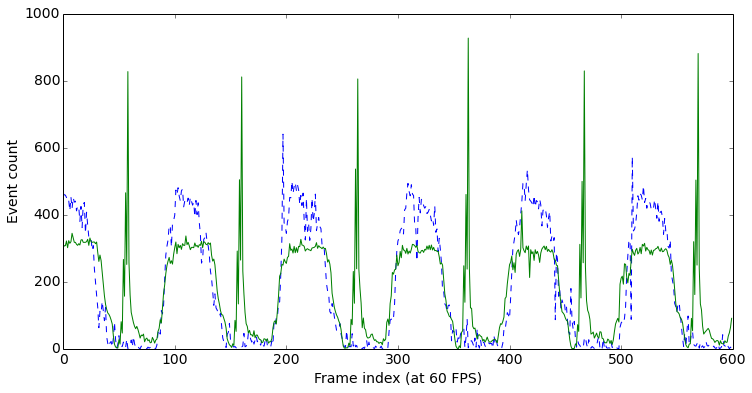

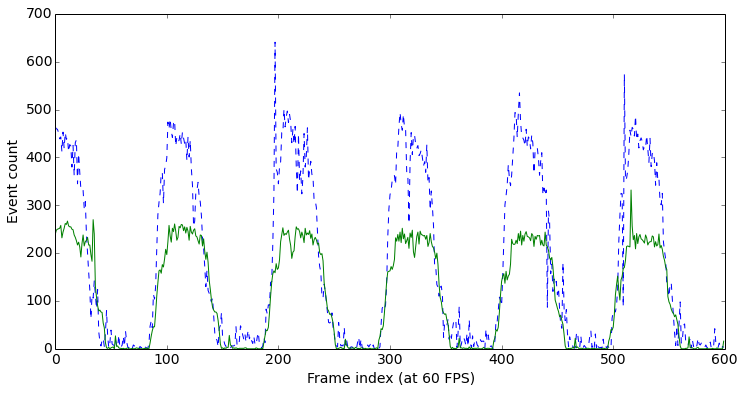

In [76]:
font = {'family' : 'sans',
        'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)

imgw = 128

ret_stats = pickle.load(open('./retina_stats.pkl', 'rb'))
e12_stats = pickle.load(open('./emu_stats_12.pkl', 'rb'))
e24_stats = pickle.load(open('./emu_stats_24.pkl', 'rb'))
e48_stats = pickle.load(open('./emu_stats_48.pkl', 'rb'))

max_ret_up = np.max(ret_stats['up'])
max_ret_down = np.max(ret_stats['down'])
avg_ret_up = np.mean(ret_stats['up'])
max_e12_up = np.max(e12_stats['up'])
max_e24_up = np.max(e24_stats['up'])
max_e48_up = np.max(e48_stats['up'])

print(max_ret_up, max_ret_down)
num_frames = len(ret_stats['up'])
end_frame = num_frames//2
max_pix = 1.#float(imgw**2)

pf = plt.plot
fsize = (12, 6)
fig = plt.figure(figsize=fsize)
v = np.array(ret_stats['up'][:end_frame])/max_pix
pf(v, '--', markeredgewidth=0, markersize=4)
v = np.array(e12_stats['up'][:end_frame])/max_pix
pf(v)
plt.xlabel("Frame index (at 60 FPS)")
plt.ylabel("Event count")
plt.savefig("./event_compare_12.pdf")
plt.show()

fig = plt.figure(figsize=fsize)
v = np.array(ret_stats['up'][:end_frame])/max_pix
pf(v, '--', markeredgewidth=0, markersize=4)
v = np.array(e24_stats['up'][:end_frame])/max_pix
pf(v)
plt.xlabel("Frame index (at 60 FPS)")
plt.ylabel("Event count")
plt.savefig("./event_compare_24.pdf")
plt.show()

fig = plt.figure(figsize=fsize)
v = np.array(ret_stats['up'][:end_frame])/max_pix
pf(v,  '--', markeredgewidth=0, markersize=4)
v = np.array(e48_stats['up'][:end_frame])/max_pix
pf(v)
plt.xlabel("Frame index (at 60 FPS)")
plt.ylabel("Event count")
plt.savefig("./event_compare_48.pdf")
plt.show()

641 641


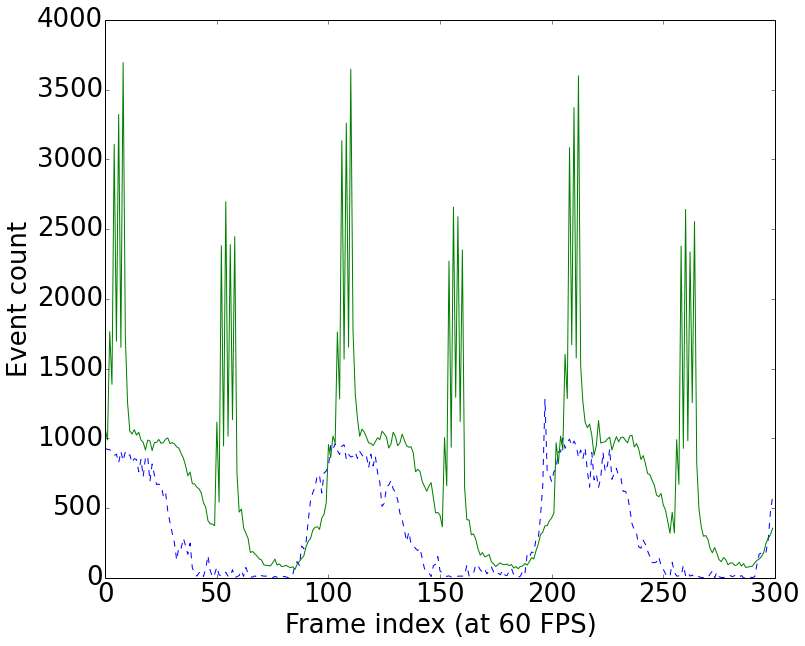

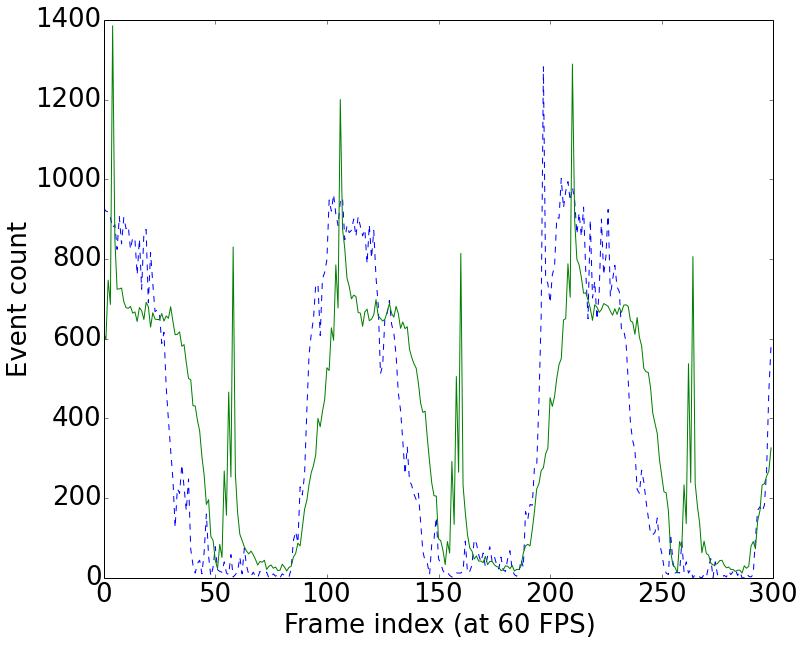

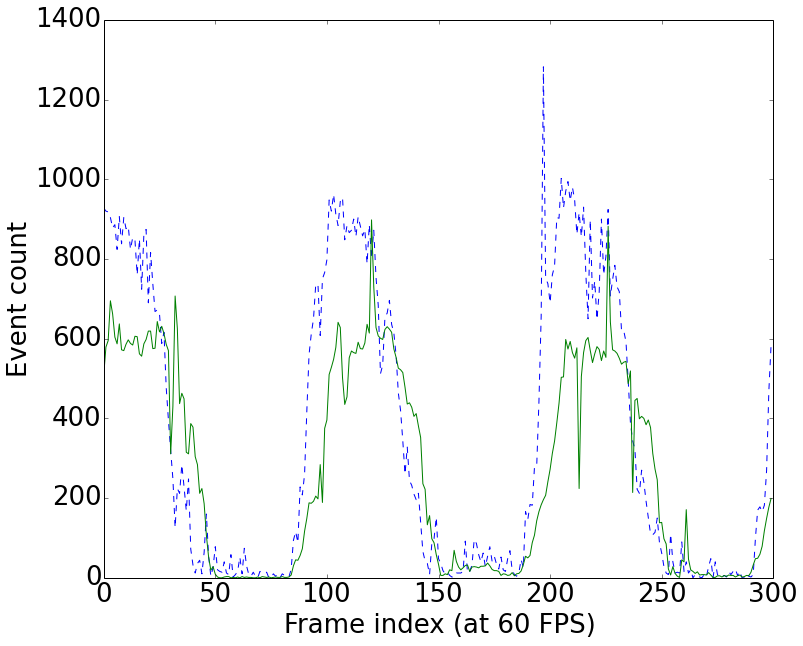

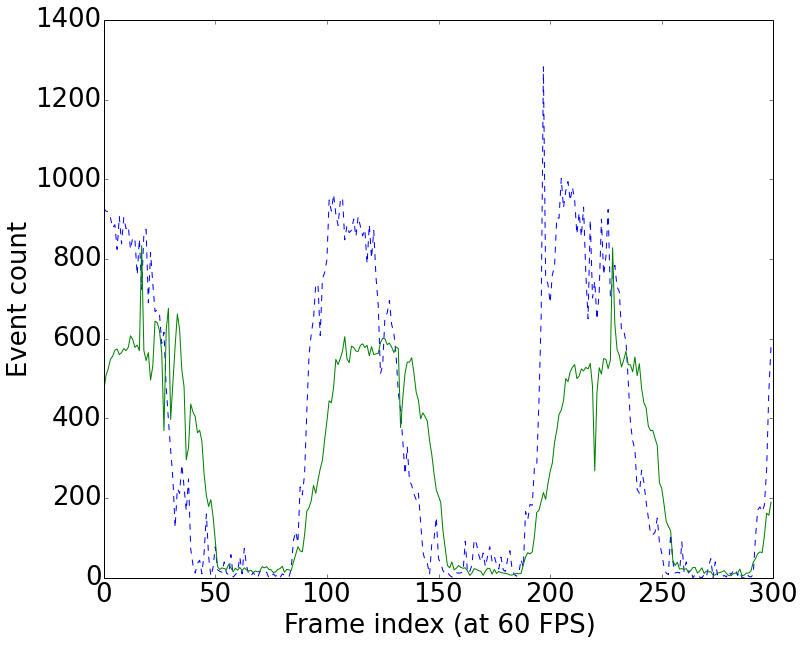

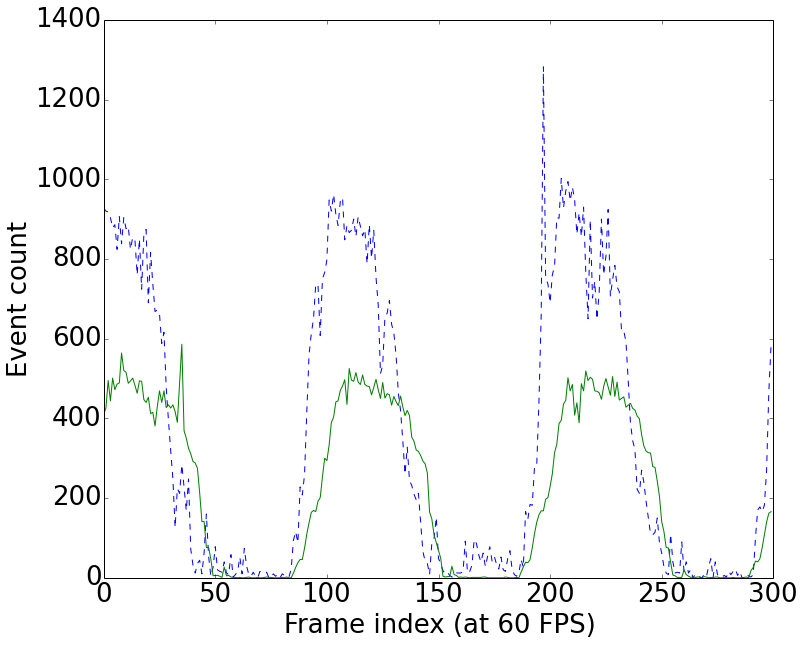

In [121]:
font = {'family' : 'sans',
        'weight' : 'normal',
        'size'   : 26}

matplotlib.rc('font', **font)

imgw = 128

ret_stats = pickle.load(open('./retina_stats.pkl', 'rb'))
e12_stats = pickle.load(open('./emu_stats_12.pkl', 'rb'))
e24_stats = pickle.load(open('./emu_stats_24.pkl', 'rb'))
e36_stats = pickle.load(open('./emu_stats_30.pkl', 'rb'))
e30_stats = pickle.load(open('./emu_stats_36.pkl', 'rb'))
e48_stats = pickle.load(open('./emu_stats_48.pkl', 'rb'))

max_ret_up = np.max(ret_stats['up'])
max_ret_down = np.max(ret_stats['down'])
avg_ret_up = np.mean(ret_stats['up'])
max_e12_up = np.max(e12_stats['up'])
max_e24_up = np.max(e24_stats['up'])
max_e48_up = np.max(e48_stats['up'])

print(max_ret_up, max_ret_down)
num_frames = len(ret_stats['up'])
end_frame = num_frames//4
max_pix = 1.#float(imgw**2)

pf = plt.plot
fsize = (12, 10)
fig = plt.figure(figsize=fsize)
v = np.array(ret_stats['up'][:end_frame])/max_pix + \
    np.array(ret_stats['down'][:end_frame])/max_pix
pf(v, '--', color='blue', markeredgewidth=0, markersize=4)

v = np.array(e12_stats['up'][:end_frame])/max_pix + \
    np.array(e12_stats['down'][:end_frame])/max_pix
pf(v, 'g')

plt.xlabel("Frame index (at 60 FPS)")
plt.ylabel("Event count")
plt.savefig("./event_compare_12.pdf")
plt.show()

fig = plt.figure(figsize=fsize)
v = np.array(ret_stats['up'][:end_frame])/max_pix + \
    np.array(ret_stats['down'][:end_frame])/max_pix
pf(v, '--', color='blue', markeredgewidth=0, markersize=4)
v = np.array(e24_stats['up'][:end_frame])/max_pix + \
    np.array(e24_stats['down'][:end_frame])/max_pix
pf(v, 'g')

plt.xlabel("Frame index (at 60 FPS)")
plt.ylabel("Event count")
plt.savefig("./event_compare_24.pdf")
plt.show()


fig = plt.figure(figsize=fsize)
v = np.array(ret_stats['up'][:end_frame])/max_pix + \
    np.array(ret_stats['down'][:end_frame])/max_pix
pf(v, '--', color='blue', markeredgewidth=0, markersize=4)

v = np.array(e30_stats['up'][:end_frame])/max_pix + \
    np.array(e30_stats['down'][:end_frame])/max_pix
pf(v, 'g')


plt.xlabel("Frame index (at 60 FPS)")
plt.ylabel("Event count")
plt.savefig("./event_compare_30.pdf")
plt.show()


fig = plt.figure(figsize=fsize)
v = np.array(ret_stats['up'][:end_frame])/max_pix + \
    np.array(ret_stats['down'][:end_frame])/max_pix
pf(v, '--', color='blue', markeredgewidth=0, markersize=4)

v = np.array(e36_stats['up'][:end_frame])/max_pix + \
    np.array(e36_stats['down'][:end_frame])/max_pix
pf(v, 'g')


plt.xlabel("Frame index (at 60 FPS)")
plt.ylabel("Event count")
plt.savefig("./event_compare_36.pdf")
plt.show()

fig = plt.figure(figsize=fsize)
v = np.array(ret_stats['up'][:end_frame])/max_pix + \
    np.array(ret_stats['down'][:end_frame])/max_pix
pf(v, '--', color='blue', markeredgewidth=0, markersize=4)

v = np.array(e48_stats['up'][:end_frame])/max_pix + \
    np.array(e48_stats['down'][:end_frame])/max_pix
pf(v, 'g')


plt.xlabel("Frame index (at 60 FPS)")
plt.ylabel("Event count")
plt.savefig("./event_compare_48.pdf")
plt.show()

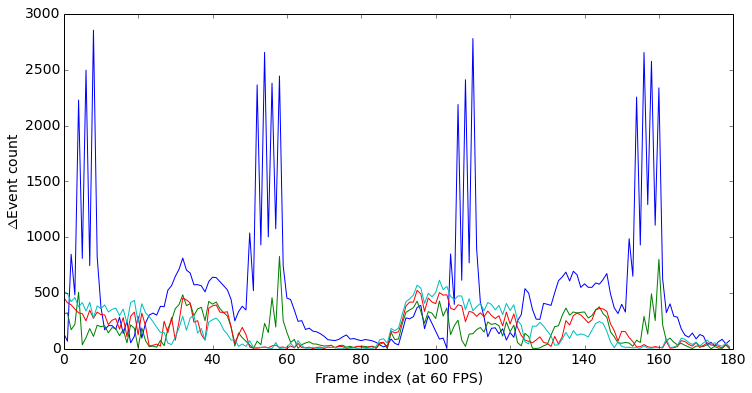

In [115]:
end_frame = 180 # num_frames//7

fig = plt.figure(figsize=fsize)

o = np.array(ret_stats['up'][:end_frame])/max_pix + \
    np.array(ret_stats['down'][:end_frame])/max_pix
    
v = np.array(e12_stats['up'][:end_frame])/max_pix + \
    np.array(e12_stats['down'][:end_frame])/max_pix
v = np.abs(v - o)
# max_dv = np.max(v)
# v = (v/max_dv)*100.
pf(v)

v = np.array(e24_stats['up'][:end_frame])/max_pix + \
    np.array(e24_stats['down'][:end_frame])/max_pix
v = np.abs(v - o)
# v = (v/max_dv)*100.
pf(v)

v = np.array(e36_stats['up'][:end_frame])/max_pix + \
    np.array(e36_stats['down'][:end_frame])/max_pix
v = np.abs(v - o)
# v = (v/max_dv)*100.
pf(v)

v = np.array(e48_stats['up'][:end_frame])/max_pix + \
    np.array(e48_stats['down'][:end_frame])/max_pix
v = np.abs(v - o)
# v = (v/max_dv)*100.
pf(v)


# pf(o, '--', color='magenta', markeredgewidth=0, markersize=4)


plt.xlabel("Frame index (at 60 FPS)")
plt.ylabel(r"$\Delta$Event count")
plt.savefig("./event_compare_all.pdf")
plt.show()